In [79]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib import*

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv('../data/Week1_challenge_data_source(CSV).csv',  na_values=['?', None])
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
# column names
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [4]:
len(db.columns)

55

In [5]:
db.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [6]:
db.shape

(150001, 55)

In [7]:
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 150001 rows and 55 columns


In [8]:
db.isnull().sum().sum()

1031392

In [9]:
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Telecommunication dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)

The Telecommunication dataset contains 12.5 % missing values.


In [10]:
db.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [11]:
db.skew(axis=0)
# to check the distribution of the data of the whole columns

Bearer Id                                     0.026666
Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952609
IMSI                                         41.045956
MSISDN/Number                               332.155856
IMEI                                          1.071470
Avg RTT DL (ms)                              62.907828
Avg RTT UL (ms)                              28.457415
Avg Bearer TP DL (kbps)                       2.589437
Avg Bearer TP UL (kbps)                       4.503413
TCP DL Retrans. Vol (Bytes)                  15.951809
TCP UL Retrans. Vol (Bytes)                  84.113393
DL TP < 50 Kbps (%)                          -2.297803
50 Kbps < DL TP < 250 Kbps (%)                3.271453
250 Kbps < DL TP < 1 Mbps (%)                 4.566158
DL TP > 1 Mbps (%)                            5.370351
UL TP < 10 Kbps (%)                          -8.985016
10 Kbps < 

<AxesSubplot:>

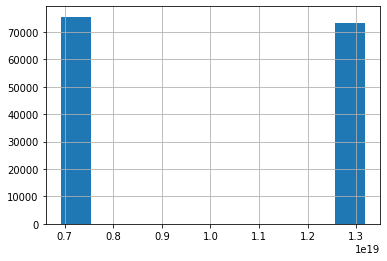

In [12]:
db['Bearer Id'].hist()
# to check the distribution of the data of a column

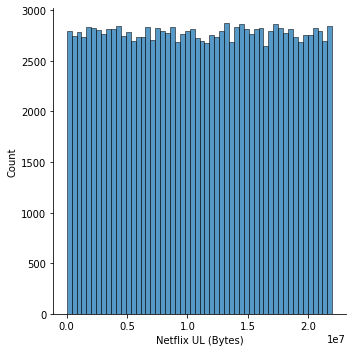

In [13]:
import seaborn as sns
sns.displot(data=db, x=db['Netflix UL (Bytes)'])
# to check the distribution of the data of a specific column

In [14]:
df_clean = db.drop(
    ['Nb of sec with 125000B < Vol DL' ,             
'Nb of sec with 1250B < Vol UL < 6250B' ,     
'Nb of sec with 31250B < Vol DL < 125000B',     
'Nb of sec with 37500B < Vol UL',              
'Nb of sec with 6250B < Vol DL < 31250B',       
'Nb of sec with 6250B < Vol UL < 37500B',      
'Nb of sec with Vol DL < 6250B',                
'Nb of sec with Vol UL < 1250B',
 'DL TP < 50 Kbps (%)',                         
'50 Kbps < DL TP < 250 Kbps (%)',              
'250 Kbps < DL TP < 1 Mbps (%)',               
'DL TP > 1 Mbps (%)',                          
'UL TP < 10 Kbps (%)',                         
'10 Kbps < UL TP < 50 Kbps (%)',               
'50 Kbps < UL TP < 300 Kbps (%)',              
'UL TP > 300 Kbps (%)',    
    ], axis=1)
df_clean.shape

(150001, 39)

In [15]:
df_clean.dtypes

Bearer Id                      float64
Start                           object
Start ms                       float64
End                             object
End ms                         float64
Dur. (ms)                      float64
IMSI                           float64
MSISDN/Number                  float64
IMEI                           float64
Last Location Name              object
Avg RTT DL (ms)                float64
Avg RTT UL (ms)                float64
Avg Bearer TP DL (kbps)        float64
Avg Bearer TP UL (kbps)        float64
TCP DL Retrans. Vol (Bytes)    float64
TCP UL Retrans. Vol (Bytes)    float64
HTTP DL (Bytes)                float64
HTTP UL (Bytes)                float64
Activity Duration DL (ms)      float64
Activity Duration UL (ms)      float64
Dur. (ms).1                    float64
Handset Manufacturer            object
Handset Type                    object
Social Media DL (Bytes)        float64
Social Media UL (Bytes)        float64
Google DL (Bytes)        

In [16]:
df_clean.isna().sum()

Bearer Id                        991
Start                              1
Start ms                           1
End                                1
End ms                             1
Dur. (ms)                          1
IMSI                             570
MSISDN/Number                   1066
IMEI                             572
Last Location Name              1153
Avg RTT DL (ms)                27829
Avg RTT UL (ms)                27812
Avg Bearer TP DL (kbps)            1
Avg Bearer TP UL (kbps)            1
TCP DL Retrans. Vol (Bytes)    88146
TCP UL Retrans. Vol (Bytes)    96649
HTTP DL (Bytes)                81474
HTTP UL (Bytes)                81810
Activity Duration DL (ms)          1
Activity Duration UL (ms)          1
Dur. (ms).1                        1
Handset Manufacturer             572
Handset Type                     572
Social Media DL (Bytes)            0
Social Media UL (Bytes)            0
Google DL (Bytes)                  0
Google UL (Bytes)                  0
E

In [17]:
df_clean['Start'] = df_clean['Start'].fillna(df_clean['Start'].mode()[0])
df_clean['End'] = df_clean['End'].fillna(df_clean['End'].mode()[0])
df_clean['Last Location Name'] = df_clean['Last Location Name'].fillna(df_clean['Last Location Name'].mode()[0])
df_clean['Handset Manufacturer'] = df_clean['Handset Manufacturer'].fillna(df_clean['Handset Manufacturer'].mode()[0])
df_clean['Handset Type'] = df_clean['Handset Type'].fillna(df_clean['Handset Type'].mode()[0])

In [18]:
df_clean['Bearer Id'] = df_clean['Bearer Id'].fillna(df_clean['Bearer Id'].median())
df_clean['Start ms'] = df_clean['Start ms'].fillna(df_clean['Start ms'].median())
df_clean['End ms'] = df_clean['End ms'].fillna(df_clean['End ms'].median())
df_clean['Dur. (ms)'] = df_clean['Dur. (ms)'].fillna(df_clean['Dur. (ms)'].median())
df_clean['IMSI'] = df_clean['IMSI'].fillna(df_clean['IMSI'].median())
df_clean['MSISDN/Number'] = df_clean['MSISDN/Number'].fillna(df_clean['MSISDN/Number'].median())
df_clean['IMEI'] = df_clean['IMEI'].fillna(df_clean['IMEI'].median())
df_clean['Avg RTT DL (ms)'] = df_clean['Avg RTT DL (ms)'].fillna(df_clean['Avg RTT DL (ms)'].median())
df_clean['Avg RTT UL (ms)'] = df_clean['Avg RTT UL (ms)'].fillna(df_clean['Avg RTT UL (ms)'].median())
df_clean['Avg Bearer TP DL (kbps)'] = df_clean['Avg Bearer TP DL (kbps)'].fillna(df_clean['Avg Bearer TP DL (kbps)'].median())
df_clean['Avg Bearer TP UL (kbps)'] = df_clean['Avg Bearer TP UL (kbps)'].fillna(df_clean['Avg Bearer TP UL (kbps)'].median())
df_clean['TCP DL Retrans. Vol (Bytes)'] = df_clean['TCP DL Retrans. Vol (Bytes)'].fillna(df_clean['TCP DL Retrans. Vol (Bytes)'].median())
df_clean['TCP UL Retrans. Vol (Bytes)'] = df_clean['TCP UL Retrans. Vol (Bytes)'].fillna(df_clean['TCP UL Retrans. Vol (Bytes)'].median())
df_clean['HTTP DL (Bytes)'] = df_clean['HTTP DL (Bytes)'].fillna(df_clean['HTTP DL (Bytes)'].median())
df_clean['HTTP UL (Bytes)'] = df_clean['HTTP UL (Bytes)'].fillna(df_clean['HTTP UL (Bytes)'].median())
df_clean['Activity Duration DL (ms)'] = df_clean['Activity Duration DL (ms)'].fillna(df_clean['Activity Duration DL (ms)'].median())
df_clean['Activity Duration UL (ms)'] = df_clean['Activity Duration UL (ms)'].fillna(df_clean['Activity Duration UL (ms)'].median())

In [19]:
df_clean['Dur. (ms).1'] = df_clean['Dur. (ms).1'].fillna(df_clean['Dur. (ms).1'].median())
df_clean['Total DL (Bytes)'] = df_clean['Total DL (Bytes)'].fillna(df_clean['Total DL (Bytes)'].median())

In [20]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(10)

,0
1480,12.692481
560,123.438851
527,6.041922
1342,27.968321
1592,197.115583
1311,20.956123
419,284.655774
506,569.808396
999,705.281990
931,20.509284


In [21]:
original_data[0].min(), original_data[0].max()

(0.1671749760942774, 1532.39137912198)

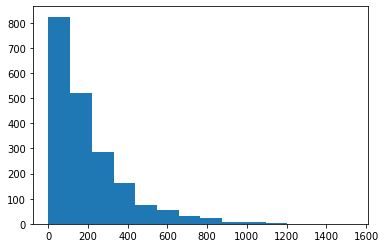

In [22]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

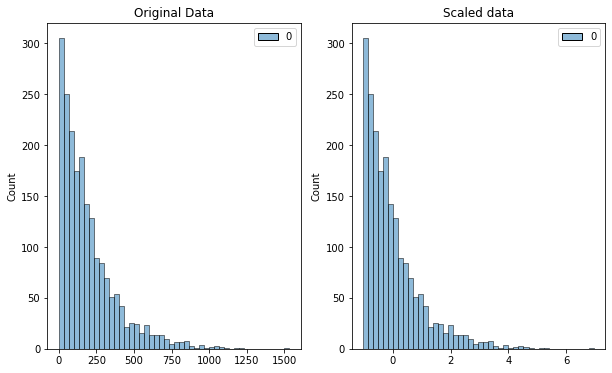

In [23]:
from sklearn.preprocessing import StandardScaler
def standard_scaler(df):
    s_scaler = StandardScaler()
    scaled_data = s_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
standard_scaler(original_data)

In [37]:
df1 = df_clean.drop([
    'Social Media DL (Bytes)',   
'Social Media UL (Bytes)',        
'Google DL (Bytes)',              
'Google UL (Bytes)',              
'Email DL (Bytes)',               
'Email UL (Bytes)',               
'Youtube DL (Bytes)',             
'Youtube UL (Bytes)',            
'Netflix DL (Bytes)',             
'Netflix UL (Bytes)',            
'Gaming DL (Bytes)',              
'Gaming UL (Bytes)',             
'Other DL (Bytes)',               
'Other UL (Bytes)',              
'Total UL (Bytes)',            
'Total DL (Bytes)',
'Last Location Name',              
'Avg RTT DL (ms)',                
'Avg RTT UL (ms)',                
'Avg Bearer TP DL (kbps)',        'Avg Bearer TP UL (kbps)',        
'TCP DL Retrans. Vol (Bytes)',    'TCP UL Retrans. Vol (Bytes)',   
'HTTP DL (Bytes)',                
'HTTP UL (Bytes)', 
],axis = 1

)

In [38]:
df1.dtypes


Bearer Id                    float64
Start                         object
Start ms                     float64
End                           object
End ms                       float64
Dur. (ms)                    float64
IMSI                         float64
MSISDN/Number                float64
IMEI                         float64
Activity Duration DL (ms)    float64
Activity Duration UL (ms)    float64
Dur. (ms).1                  float64
Handset Manufacturer          object
Handset Type                  object
dtype: object

In [61]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    
    return df[bytes_data]

pd.options.display.float_format = format_float

In [48]:
df_clean.value_counts('Handset Type').head(11)

Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Samsung Galaxy A5 Sm-A520F       3724
dtype: int64

In [49]:
handset_top3 = df_clean.value_counts('Handset Manufacturer').head(3)
handset_top3

Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
dtype: int64

In [54]:
df_clean.groupby('Handset Manufacturer')[['Handset Type']].sum()

,Handset Type
Handset Manufacturer,
A-Link Telecom International Co Limited,A-Link Telecom I. Cubot X18 PlusA-Link Telecom...
ASUSTeK,Asustek Asus Ze550Kl Zenfone2 LaserAsustek Asu...
Acer,Acer Liquid Zest PlusAcer M310Acer Liquid Z220...
Adar,Adar Stanley Mobile S231
Alif Communications,Alif Communicati. Pulian Cm84
...,...
Zebra Technologies Corp.,Zebra Technologi. Symbol Tc55BhZebra Technolog...
Zte,Zte Mf259Zte Mf259Zte Mf259Zte Mf259Zte Mf259Z...
ZyXEL Communications Corp,Zyxel Communicat. Zyxel Wah7706


In [60]:
df_clean.groupby('IMEI')

In [62]:
percent_missing(df_clean)

The Telecommunication dataset contains 0.0 % missing values.


In [63]:
missing_values_table(df_clean)

Your selected dataframe has 39 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Total UL (Bytes),1,0.00,float64


In [64]:
db.shape

(150001, 55)

In [65]:
pd.set_option('max_column', None)
df = pd.read_excel("../data/Week1_challenge_data_source.json", engine = 'openpyxl')
df.head()

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [66]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━ 143.4/242.1 kB 31.9 kB/s eta 0:00:04:04
ERROR: Exception:
Traceback (most recent call last):
  File "/home/tina/snap/jupyter/common/lib/python3.7/site-packages/pip/_vendor/urllib3/response.py", line 435, in _error_catcher
    yield
  File "/home/tina/snap/jupyter/common/lib/python3.7/site-packages/pip/_vendor/urllib3/response.py", line 516, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/home/tina/snap/jupyter/common/lib/python3.7/site-packages/pip/_vendor/cachecontrol/filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "/snap/jupyter/6/lib/python3.7/http/client.py", line 447, in read
    n = self.readinto(b)
  File "/snap/jupyter/6/lib/python3.7/http/client.py", line 491, in readinto
    n = self.fp.readinto(b)
  File "/snap/jupyter/6/lib/python3.7/socket.py", line 589, in readinto
    return self._sock.recv_into(b)
  File "/snap/jupyter/6/lib/python3.7/ssl.py", line 1052, in recv_into
    return 

In [67]:
dfExp = df_clean.copy()
dfExp

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,42.00,5.00,23.00,44.00,"568,730.00","20,949.50","1,941,949.00","229,733.00","37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,"568,730.00","20,949.50","1,941,949.00","229,733.00",168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),"1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,45.00,5.00,6.00,9.00,"568,730.00","20,949.50","1,941,949.00","229,733.00",0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),"1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,45.00,5.00,44.00,44.00,"568,730.00","20,949.50","1,941,949.00","229,733.00","3,330.00","37,882.00","1,321,509,685.00",undefined,undefined,"644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,45.00,5.00,6.00,9.00,"568,730.00","20,949.50","1,941,949.00","229,733.00",0.00,0.00,"1,089,009,389.00",Samsung,Samsung Sm-G390F,"862,600.00","50,188.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,"7,277,825,670,196,679,680.00",4/29/2019 7:28,451.00,4/30/2019 6:02,214.00,"81,230.00","208,202,201,200,072.00","33,650,688,697.00","35,483,109,451,938.00",D20434A,32.00,0.00,52.00,65.00,"568,730.00","20,949.50","1,941,949.00","229,733.00","42,376.00","41,915.00","81,230,763.00",Apple,Apple iPhone 8 Plus (A1897),"3,464,974.00","52,091.00","9,967,603.00","2,817,311.00","57,639.00","633,237.

In [68]:
dfExp.dtypes

Bearer Id                      float64
Start                           object
Start ms                       float64
End                             object
End ms                         float64
Dur. (ms)                      float64
IMSI                           float64
MSISDN/Number                  float64
IMEI                           float64
Last Location Name              object
Avg RTT DL (ms)                float64
Avg RTT UL (ms)                float64
Avg Bearer TP DL (kbps)        float64
Avg Bearer TP UL (kbps)        float64
TCP DL Retrans. Vol (Bytes)    float64
TCP UL Retrans. Vol (Bytes)    float64
HTTP DL (Bytes)                float64
HTTP UL (Bytes)                float64
Activity Duration DL (ms)      float64
Activity Duration UL (ms)      float64
Dur. (ms).1                    float64
Handset Manufacturer            object
Handset Type                    object
Social Media DL (Bytes)        float64
Social Media UL (Bytes)        float64
Google DL (Bytes)        

In [69]:
dfExp["Dur. (ms)"].describe()

count     150,001.00
mean      104,608.44
std        81,037.36
min         7,142.00
25%        57,442.00
50%        86,399.00
75%       132,430.00
max     1,859,336.00
Name: Dur. (ms), dtype: float64

In [72]:
dfExp["Handset Type"].describe()

count               150001
unique                1396
top       Huawei B528S-23A
freq                 20324
Name: Handset Type, dtype: object

In [73]:
dfExp["Handset Manufacturer"].describe()

count     150001
unique       170
top        Apple
freq       60137
Name: Handset Manufacturer, dtype: object

In [82]:
plot_count(dfExp, "Handset Type")

NameError: name 'plot_count' is not defined